In [1]:
import pandas as pd
import wooldridge
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
df = wooldridge.data('MEAP93')
df

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.400000,1862,112.599998,5765,37498.0,7420,2.900000,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.300000,11355,101.199997,6601,48722.0,10370,1.300000,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.700000,7685,114.000000,6834,44541.0,7313,3.500000,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.400000,1148,85.400002,3586,31566.0,5989,3.600000,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.400000,1572,96.099998,3847,29781.0,5545,0.000000,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,60.900002,1689,78.400002,5380,41856.0,9468,35.799999,23.500000,7.000000,11.200000,51324.0,10.845914,8.590444,7.431892,4.361824,0.226204,10.641991
404,61.099998,2631,100.699997,5088,35020.0,7655,17.500000,61.099998,8.100000,22.700001,42675.0,10.661368,8.534640,7.875119,4.612146,0.218589,10.463675
405,73.800003,4024,85.199997,3942,32678.0,6220,8.700000,83.300003,11.500000,26.799999,38898.0,10.568698,8.279444,8.300032,4.445002,0.190342,10.394458
406,74.400002,850,122.400002,5029,29210.0,6513,1.600000,91.900002,9.500000,9.700000,35723.0,10.483550,8.522977,6.745236,4.807294,0.222972,10.282267


In [15]:
# Adding a constant (intercept) term to the independent variable
X = sm.add_constant(df['lnchprg'])

# Fit the OLS model
model = sm.OLS(df['math10'], X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     83.77
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.75e-18
Time:                        20:53:24   Log-Likelihood:                -1499.3
No. Observations:                 408   AIC:                             3003.
Df Residuals:                     406   BIC:                             3011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.1427      0.998     32.221      0.0

In [39]:
(32.1427) - (0.3189*13.1)

27.965109999999996

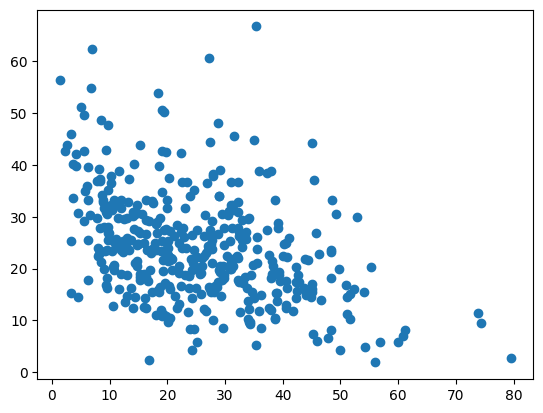

In [14]:
plt.scatter(df['lnchprg'],df['math10'])

In [25]:
(df[df['lnchprg']==13.100000].math10).mean()

nan

In [16]:
df['lnchprg'].describe()

count    408.000000
mean      25.201471
std       13.610075
min        1.400000
25%       14.625000
50%       23.849999
75%       33.825000
max       79.500000
Name: lnchprg, dtype: float64

In [24]:
pd.set_option('display.max_rows', None)
df['lnchprg'].value_counts()


lnchprg
9.700000     4
19.000000    4
27.700001    4
13.100000    4
32.299999    4
40.599998    3
25.200001    3
42.299999    3
16.400000    3
20.100000    3
29.799999    3
14.400000    3
20.400000    3
12.000000    3
29.000000    3
45.099998    3
27.400000    3
22.299999    3
31.100000    3
27.200001    3
15.200000    3
28.700001    3
3.400000     3
14.800000    3
17.299999    3
35.400002    2
18.000000    2
31.299999    2
25.900000    2
26.100000    2
26.299999    2
18.400000    2
16.299999    2
16.000000    2
26.700001    2
15.300000    2
15.000000    2
18.299999    2
18.900000    2
18.500000    2
24.200001    2
23.799999    2
23.900000    2
38.000000    2
22.600000    2
22.100000    2
22.000000    2
21.600000    2
38.099998    2
20.900000    2
38.599998    2
20.299999    2
18.700001    2
20.200001    2
20.000000    2
24.299999    2
39.000000    2
19.700001    2
19.600000    2
39.200001    2
35.599998    2
19.200001    2
24.700001    2
14.700000    2
14.100000    2
34.299999    2
10

In [36]:
abs(df['lnchprg'] - 13.100000) < tolerance

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [34]:
# Checking within a tolerance range
tolerance = 0.000001  # Define a tolerance level for comparison
result = df[abs(df['lnchprg'] - 13.100000) < tolerance]
result

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
85,13.1,1860,92.300003,3865,32436.0,5681,4.5,82.900002,14.800000,48.900002,38117.0,10.548415,8.259717,7.528332,4.525044,0.175145,10.387024
86,13.1,808,88.000000,4326,34730.0,7508,22.0,85.000000,29.799999,49.400002,42238.0,10.651075,8.372398,6.694562,4.477337,0.216182,10.455359
87,13.1,4704,118.000000,4373,28149.0,4244,5.8,77.699997,18.700001,43.099998,32393.0,10.385697,8.383204,8.456168,4.770685,0.150769,10.245267
88,13.1,4521,99.300003,5793,43840.0,8648,4.7,83.500000,25.900000,54.700001,52488.0,10.868340,8.664406,8.416489,4.598145,0.197263,10.688302


In [38]:
result.math10.mean()

22.299999952316284

In [2]:
df = wooldridge.data('GPA1')
df.to_markdown

<bound method DataFrame.to_markdown of      age  soph  junior  senior  senior5  male  campus  business  engineer  \
0     21     0       0       1        0     0       0         1         0   
1     21     0       0       1        0     0       0         1         0   
2     20     0       1       0        0     0       0         1         0   
3     19     1       0       0        0     1       1         1         0   
4     20     0       1       0        0     0       0         1         0   
..   ...   ...     ...     ...      ...   ...     ...       ...       ...   
136   22     0       0       0        1     0       0         1         0   
137   21     0       0       1        0     1       0         1         0   
138   20     0       1       0        0     0       0         1         0   
139   20     0       1       0        0     1       1         1         0   
140   21     0       0       1        0     1       0         0         0   

     colGPA  ...  greek  car  siblin

In [4]:
df.columns

Index(['age', 'soph', 'junior', 'senior', 'senior5', 'male', 'campus',
       'business', 'engineer', 'colGPA', 'hsGPA', 'ACT', 'job19', 'job20',
       'drive', 'bike', 'walk', 'voluntr', 'PC', 'greek', 'car', 'siblings',
       'bgfriend', 'clubs', 'skipped', 'alcohol', 'gradMI', 'fathcoll',
       'mothcoll'],
      dtype='object')

In [3]:
# Adding a constant (intercept) term to the independent variable
X = sm.add_constant(df[['hsGPA','ACT']])

# Fit the OLS model
model = sm.OLS(df['colGPA'], X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.53e-06
Time:                        12:05:07   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2863      0.341      3.774      0.0

In [8]:
X = sm.add_constant(df[['hsGPA','ACT']]).to_numpy()

In [10]:
n,K=X.shape
K

3

In [10]:
df[['hsGPA','ACT']]

,hsGPA,ACT
0,3.0,21
1,3.2,24
2,3.6,26
3,3.5,27
4,3.9,28
...,...,...
136,3.3,23
137,3.6,25
138,3.4,21
139,3.7,26


In [19]:
y=df['colGPA'].to_numpy()
y

array([3.        , 3.4000001 , 3.        , 3.5       , 3.5999999 ,
       3.        , 2.70000005, 2.70000005, 2.70000005, 3.79999995,
       2.79999995, 2.9000001 , 3.        , 2.9000001 , 3.29999995,
       2.5999999 , 2.5       , 2.5       , 2.4000001 , 3.5999999 ,
       2.5999999 , 2.70000005, 2.9000001 , 3.        , 3.29999995,
       3.0999999 , 3.        , 3.20000005, 3.        , 3.4000001 ,
       2.9000001 , 3.5       , 3.70000005, 3.5       , 2.79999995,
       2.5       , 3.0999999 , 3.5       , 3.4000001 , 3.5       ,
       2.5999999 , 2.79999995, 2.5999999 , 3.5       , 4.        ,
       3.79999995, 2.79999995, 3.5       , 3.        , 2.5999999 ,
       3.        , 3.70000005, 3.        , 2.9000001 , 2.5999999 ,
       3.        , 3.29999995, 2.70000005, 3.        , 3.20000005,
       2.70000005, 3.5999999 , 2.4000001 , 2.9000001 , 3.29999995,
       3.5       , 3.        , 3.        , 2.79999995, 2.9000001 ,
       3.79999995, 2.5       , 3.        , 3.20000005, 2.20000

In [14]:
X=X.to_numpy()
X

array([[ 1.        ,  3.        , 21.        ],
       [ 1.        ,  3.20000005, 24.        ],
       [ 1.        ,  3.5999999 , 26.        ],
       [ 1.        ,  3.5       , 27.        ],
       [ 1.        ,  3.9000001 , 28.        ],
       [ 1.        ,  3.4000001 , 25.        ],
       [ 1.        ,  3.5       , 25.        ],
       [ 1.        ,  3.        , 22.        ],
       [ 1.        ,  3.        , 21.        ],
       [ 1.        ,  4.        , 27.        ],
       [ 1.        ,  3.        , 19.        ],
       [ 1.        ,  3.0999999 , 22.        ],
       [ 1.        ,  3.5       , 23.        ],
       [ 1.        ,  3.79999995, 29.        ],
       [ 1.        ,  3.70000005, 25.        ],
       [ 1.        ,  3.        , 21.        ],
       [ 1.        ,  3.5       , 29.        ],
       [ 1.        ,  3.        , 23.        ],
       [ 1.        ,  3.        , 21.        ],
       [ 1.        ,  3.5       , 29.        ],
       [ 1.        ,  3.5       , 25.   

In [16]:
X.T @ X

array([[  141.        ,   479.69999981,  3406.        ],
       [  479.69999981,  1646.32999818, 11631.69999766],
       [ 3406.        , 11631.69999766, 83408.        ]])

In [21]:
b=(np.linalg.inv(X.T @ X))@ (X.T) @ y
b

array([1.28632777, 0.45345589, 0.00942601])

In [24]:
e=y-X@b
e

array([ 1.55358320e-01,  4.36389180e-01, -1.63845229e-01,  3.72074304e-01,
        2.81265799e-01, -6.37281265e-02, -4.09073624e-01, -1.54067645e-01,
       -1.44641632e-01,  4.45346313e-01, -2.57897032e-02,  5.86857782e-04,
       -9.02216472e-02, -3.82814369e-01,  1.00235082e-01, -2.44641775e-01,
       -6.46777721e-01, -3.63493705e-01, -4.44641585e-01,  4.53222184e-01,
       -5.09073767e-01, -1.63493657e-01, -2.73271146e-01, -3.35801614e-01,
        7.01726372e-02,  9.10434438e-02, -1.73271242e-01,  3.19438835e-01,
       -2.60240774e-02,  2.09661237e-01, -2.52634714e-01,  5.00469551e-01,
        7.09895611e-01,  4.00352341e-01, -2.01315012e-01, -5.18382473e-01,
        5.51238027e-02,  4.00352341e-01,  3.26845957e-01,  3.19087154e-01,
       -6.50438940e-02, -3.80912894e-01, -2.63493800e-01,  6.74210344e-01,
        6.54772373e-01,  5.45463524e-01, -4.46417277e-02,  3.09661142e-01,
       -5.43021142e-02, -8.46324220e-04, -2.07406367e-01,  3.64198433e-01,
       -7.13696227e-02, -

In [28]:
e.T @ e 

15.982444392477987

In [31]:
(((e.T@e) * (np.linalg.inv(X.T @ X))) / (141-3))**(0.5)

C:\Users\milar\AppData\Local\Temp\ipykernel_24076\1454364806.py:1: RuntimeWarning: invalid value encountered in sqrt
  (((e.T@e) * (np.linalg.inv(X.T @ X))) / (141-3))**(0.5)


array([[0.34082212,        nan,        nan],
       [       nan, 0.09581292,        nan],
       [       nan,        nan, 0.01077719]])